In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as scp
import sys
import os
from scipy.optimize import curve_fit

In [18]:
def M(U):
    q = (0.9/10000) 
    np = 17
    ns = 17
    mu0 = 1.25663706212e-6
    #todo: den wert iwie halbieren
    return U/(47 *4* 1/(20e-3) * ns * mu0 * q)
def H(Im,Um,U):
    np = 17
    r = 1.5e-2
    u = 2*r*3.14
    L = u/2
    return np/L * Im/Um * U

def map(v):
    if v == 1:
        return 0
    else:
        return 1

In [16]:
def fit_func(x,a,b,c,d):
    return a*np.exp(-b/x + c)+d

def d_fit_func(x,a,b,c,d):
    return (a*b*np.exp((c-b)/x))/x**2

[7.91016299e+01 2.48152811e+01 8.24444679e+00 1.01717073e+04]
[1.76199605e+02 2.75023483e+01 7.47383534e+00 1.14641434e+04]


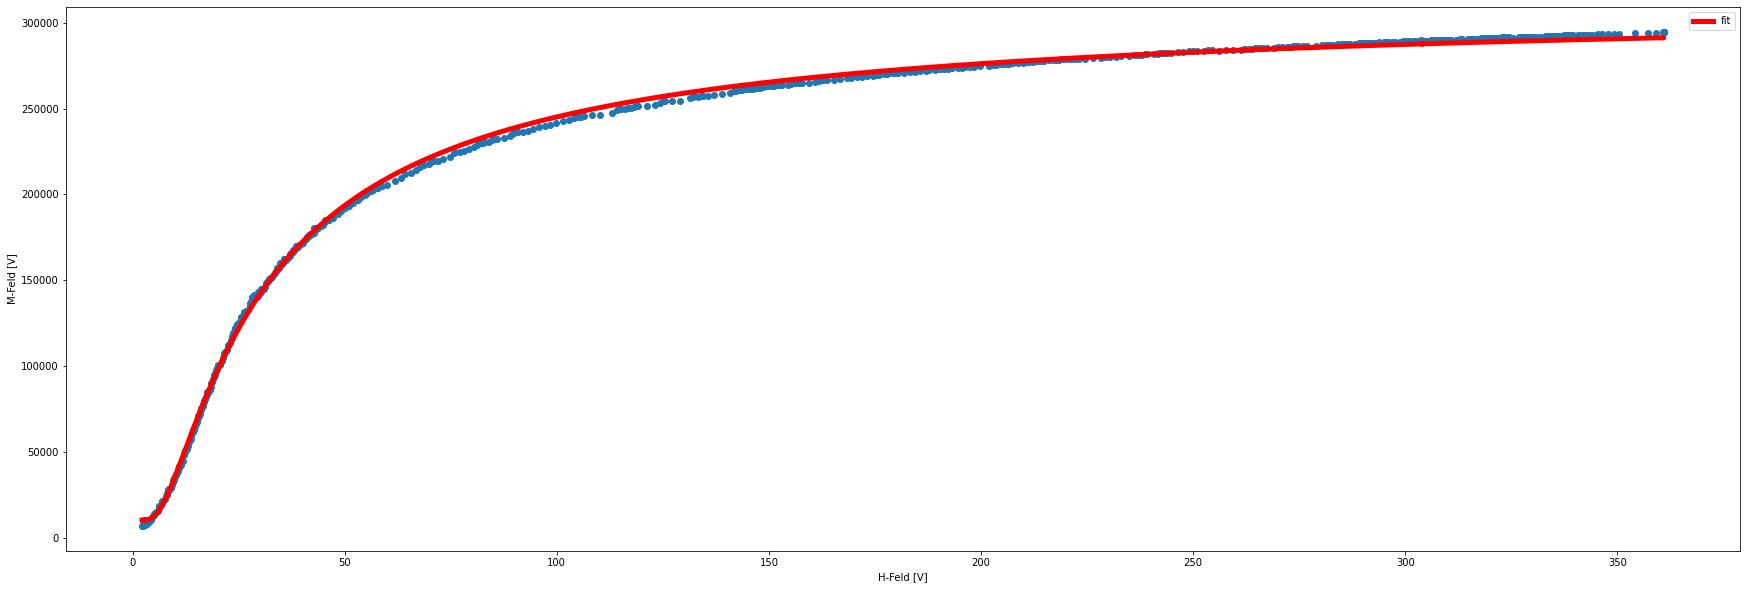

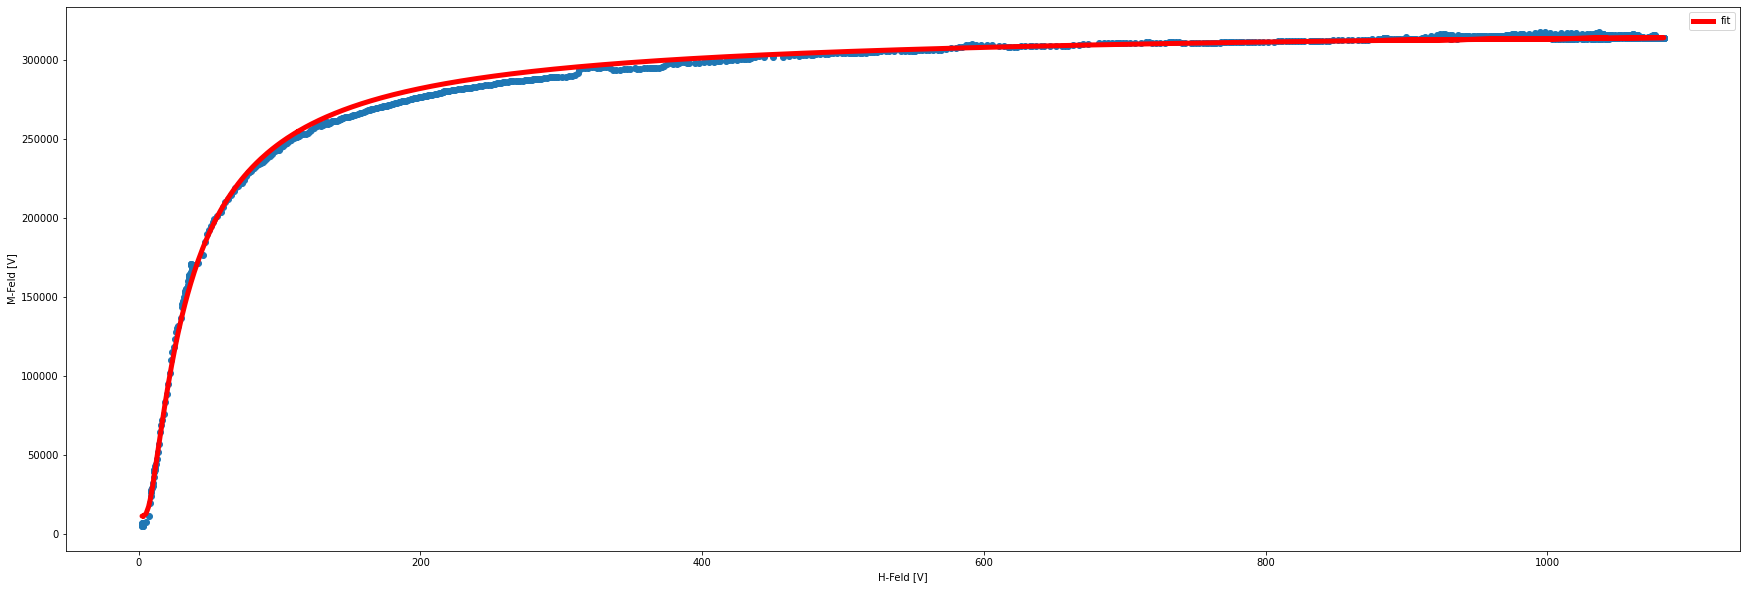

In [23]:
dx = [[],[]]
dy = [[],[]]

for name in os.listdir("Daten"):
    if "1" in name:
        Im = 1
    else:
        Im = 3
    
    plt.figure(figsize=(30,10))
    file = open("Daten/"+name)
    lines = file.readlines()
    xv,yv = [],[]
    #plt.xlim(-0.25,0.25)
    for line in lines:
        vals = line[:-1].split("\t")
        xv.append(float(vals[0]))
        yv.append(M(float(vals[1])))
    xv = np.array(xv)
    Um = max(xv)
    xv = H(Im,Um,xv)
    xv = list(xv)
    
    popt,_ = curve_fit(fit_func,xv,yv)
    print(popt)
    plt.plot(xv,[fit_func(x,*popt) for x in xv],color="red",label="fit",linewidth=5)
    dx[map(Im)] = [x for x in xv if x>0]
    dy[map(Im)] = [d_fit_func(x,*popt) for x in xv if x > 0]
    #plt.scatter([x for x in xv if x>0.5],[d_fit_func(x,*popt) for x in xv if x > 0.5],color="green",label="fit",linewidth=5)
    plt.scatter(xv,yv)
    plt.xlabel("H-Feld [V]")
    plt.ylabel("M-Feld [V]")
    plt.legend()
    file.close()

(0.0, 200.0)

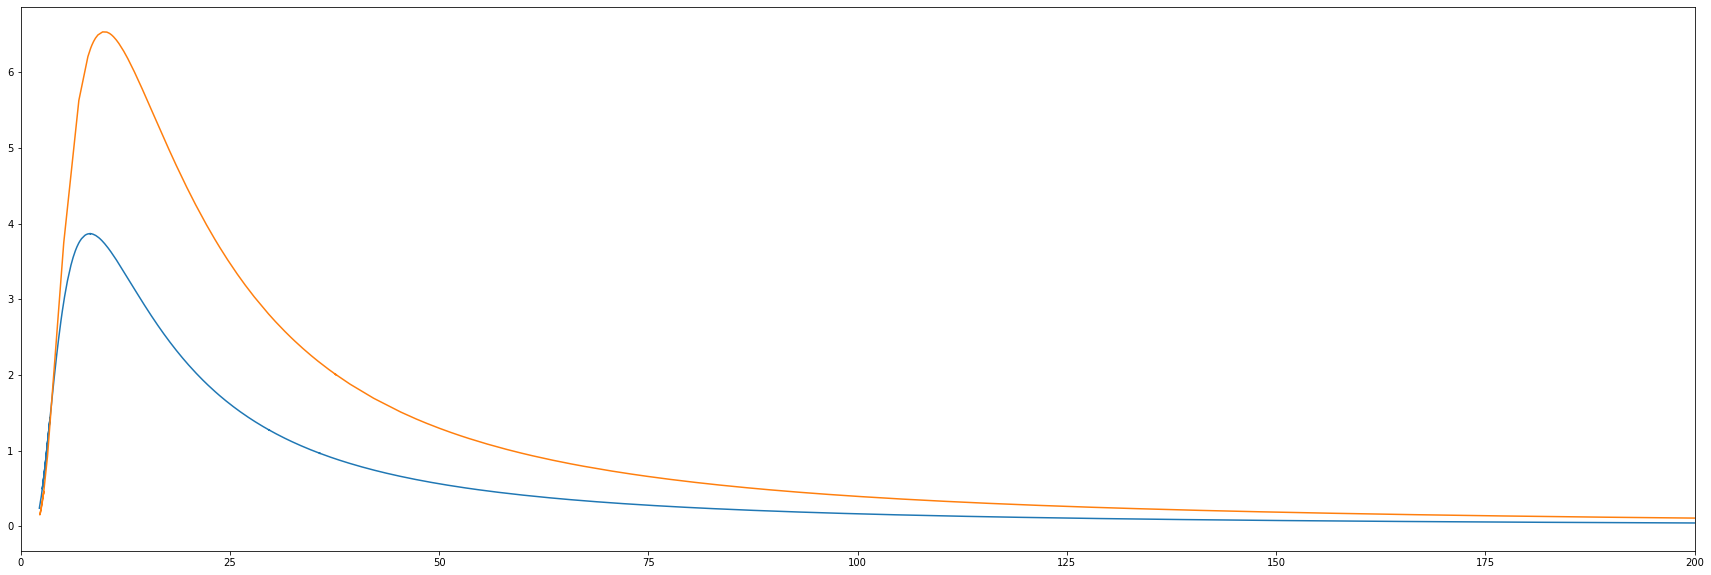

In [26]:
plt.figure(figsize=(30,10))
plt.plot(dx[0],dy[0])
plt.plot(dx[1],dy[1])
plt.xlim(0,200)